<left>
    <img src="https://kpi.ua/files/images/kpi.png" width="300" alt="kpi logo"  />
</left>

# **Курсова робота з дисципліни  "Методи оптимізації-2"**  
## **Тема : Метод найменших квадратів**
*Студентки групи КМ-82 Олійник Майї Віталіївни*

**Дана курсова робота направлена на дослідження збіжності методу найменших квадратів.**

***Постановка задачі***

Дослідити збіжність методу найменших квадратів Гауса-Ньютона при мінімізації функції Розенброка  в залежності від:
1.	Величини кроку h при обчисленні похідних.
2.	Модифікації Левенберга-Марквардта.
3.	Схеми обчислення похідних.
4.	Вигляду критерію закінчення.
  
Використати метод штрафних функцій (метод зовнішньої точки) для умовної оптимізації в залежності від:
1.	Розташування локального мінімума (всередині/поза допустимою областю).
2.	Виду допустимої області (випукла/невипукла).


## Зміст

* Анотація 
* Вступ 
* Вирішення поставленої задачі
  * Імпортування бібліотек
  * Визначення констант
  * Опис функцій
  * Обчислення
  * Відображення результатів  
* Висновки 
* Про виконавця
* Посилання

## Анотація

**Головне завдання -** є дослідження збіжності методу найменших квадратів,  в залежності від певних умов, таких як величина кроку h при обчисленні похідних, модифікація Левенберга-Марквардта, вибір схеми обчислення похідних та вигляд критерію закінчення.  
**Мета -**  якнайшвидша збіжність методу в поєднанні з достатньо високою точністю знайденої точки мінімума, аналіз методу.  
**Складнощі,під час виконання -** підбір параметрів у методах вручну,реалізації усіх компонентів досліджуваних методів чисельно.



## Вступ

***В даній курсовій роботі необхідно дослідити збіжність методу найменших квадратів Гауса-Ньютона при мінімізації функції Розенброка та  застосувати метод зовнішньої точки для умовної оптимізації.***   
  
    
Функція Розенброка:
$$ f(\overline x) =  100(x_1^2-x_2)^2 + (x_1-1)^2  $$  
Дана функція має мінімум в точці $\overline x = 
\begin{pmatrix}
  1 \\
  1
 \end{pmatrix}$ в якій значення функції $ f(\overline x) = 0 $.



---
***Теоретичні відомості :***



*Метод найменших квадратів Гауса-Ньютона* - це модифікація методу Ньютона для знаходження мінімума функції.  
Відміністю є те ,що алгоритм Гауса-Ньютона може бути використаний тільки для мінімізації суми квадратів: 
$$ F(x) = \displaystyle\sum_{i=1}^{m} (f_i(x))^2 = \|f(x)\|^2 $$  

*Переваги методу:* не вимагає обчислення других похідних, а також обчислення та обернення матриці Гессе на кожній ітерації, що значно полегшує процес мінімізації функції, але при цьому швидкість збіжності МНК Гауса-Ньютона також може досягати квадратичної; простий в реалізації.

*Недолік методу:*  якщо член другого порядку Q завеликий це призводить до некоректної роботи і повільної збіжності. 

*Додаткова умова* для можливості застосовування методу -  кількість змінних $\overline x = (x_1, x_2, ..., x_n)$ не перевищує кількість функцій $f = (f_1, f_2, ..., f_m)$, тобто $ m \geq n $.  

Нехай у нас є початкова точка $x^{(0)}$ , тоді наближення до точки мінімума виконується на кожній наступній ітерації за наступною формулою: $$ x^{(k+1)} = x^{(k)} - (J^T(x^{(k)}) J(x^{(k)}))^{-1}J^T(x^{(k)})f(x^{(k)}) $$

*Метод зовнішньої точки* - різновид методу штрафних функцій, що  задачу умовної оптимізації зводить  до вирішення послідовності задач безумовної оптимізації.  

Такі задачі будуть набувати наступного загального вигляду:
$$ P(\overline x) = f(\overline x) + R \langle g(\overline x) \rangle^2 $$ де штрафний параметр $ R \longrightarrow \infty $.  

В даному методі використовується зовнішній штраф типу квадрату зрізання. Він інтерпритується наступним чином:
$$ \langle \alpha \rangle = 
\begin{cases}
    \alpha, \alpha < 0 \\
    0,\alpha \geq 0
\end{cases} $$

## Вирішення поставленої задачі

### Імпортування бібліотек

In [2]:
import numpy as np
from math import sqrt
import plotly.graph_objects as go
import matplotlib.pyplot as plt

### Визначення констант

In [19]:
#Задача безумовної оптимізації

# початкова точка, що визначена умовою
x0 = np.array([-1.2, 0.0]) 

# крок для обчислення похідних
h1 = 0.001  
h2 = 0.0001
h3 = 0.000001

# фіксована кількість ітерацій обчислень
itr = 500  

# значення епсілон 
eps1 = 0.001  
eps2 = 0.0001
eps_lst = [0.1, 0.01, 0.001, 0.0001, 0.00001] # набір значень е для побудови діаграми

# початкове значення лямбда 
lambda_fix = 1000  

# порожні масиви 2х2, основа для матриці Якобі
Jr = np.zeros((2,2), dtype=float)  
Jc = np.zeros((2,2), dtype=float)  


#Задача умовної оптимізації

# початкова точка
x0_2 = np.array([-3,-3])  
Jrp = np.zeros((3,2), dtype=float)  # порожній масив 3х2, основа для матриці Якобі, де похідні обчислюються за правою схемою

#обмеження для представлення допустимих областей
restr1 = 0  
restr2 = 1  
restr3 = 2  
restr4 = 3  

#параметри
R = 1  
R2 = 10   

eps3 = 0.01

### Опис функцій

#### Опис функцій,які використовуються для вирішення задачі безумовної оптимізації

Дана функція *rosenbrock()* повертає значення функції Розенброка в точці х, яка приймається у форматі numpy масиву як вхідний параметр:

In [7]:
def rosenbrock(x):
    return ( 100*((x[0]**2-x[1])**2)+(x[0]-1)**2 )

Наступні три функції необхідні нам для обчислення похідних. Похідні будемо обчислювати за правою та центральною схемами.  
*Чисельне обчислення похідних за правою схемою*: $$f'_{пр} = \frac{f(x+h) - f(x)}{h}$$  
*Чисельне обчислення похідних за центральною схемою*: $$f'_{ц} = \frac{f(x+h) - f(x-h)}{2h}$$

Функція rosenbrock_elements() також приймає на вхід поточну точку х і розкладає функцію Розенброка на окремі функції:

In [8]:
def rosenbrock_elements(x):
    return  (x[0]-1)**2,100*((x[0]**2-x[1])**2),

Функції J_rigth() та J_сenter() приймають в якості параметрів точку х та довжину кроку h і повертають значення Якобіану:

In [9]:
#Якобіан за правою схемою
def J_rigth(x, h):
    for i in range(2):
        for j in range(2):
            Jr[i][j] = (rosenbrock_elements((x[0]+((j+3)%2)*h, x[1]+((j+2)%2)*h))[i] - rosenbrock_elements(x)[i])/h
    return Jr


#Якобіан за центральною схемою
def J_center(x, h):
    for i in range(2):
        for j in range(2):
            Jc[i][j] = (rosenbrock_elements((x[0]+((j+3)%2)*h, x[1]+((j+2)%2)*h))[i] -
                        rosenbrock_elements((x[0]-((j+3)%2)*h, x[1]-((j+2)%2)*h))[i])/(2*h)
    return Jc


Функція norma() приймає в якості параметру точку х та повертає значення її норми:

In [10]:
def norma(x):
    return sqrt(x[0]**2 + x[1]**2)

В даній курсовій роботі критерій закінчення буде мати два вигляда.  
*Перший варіант* критерію закінчення :
$$ \|\nabla f(x^{(k)})\| \leq \varepsilon $$  
*Другий варіант* критерію закінчення :  
$$  \begin{cases}
    \frac{\|x^{(k-1)} - x^{(k)}\|}{\|x^{(k)}\|} \leq \varepsilon \\     
    \frac{|f(x^{(k-1)}) - f(x^{(k)})|}{|f(x^{(k)})|} \leq \varepsilon
  \end{cases} $$

Функція end1() приймає поточну точку х, крок h та точність обчислення. Функція end2() приймає поточну і попередню точки х, значення функції в цих точках та точність обчислення.  
Обидві функції відповідають за перевірку критерію обчислення.

In [30]:
#реалізація першого варіанту
def end1(*args):
    point, h, eps = args
    grad = np.zeros((2))
    grad[0] = (rosenbrock((point[0]+h, point[1])) - rosenbrock((point[0]-h, point[1])))/(2*h)
    grad[1] = (rosenbrock((point[0], point[1]+h)) - rosenbrock((point[0], point[1]-h)))/(2*h)
    if norma(grad) <= eps:
        print(f'Похибка: {norma(grad)}')
        return True
    else:
        print(f'Похибка: {norma(grad)}')
        return False

#реалізація другого варіанту
def end2(*args):
    p1,p2,Fp1,Fp2,eps = args
    term1 = norma(p2-p1)/norma(p1)
    term2 = abs(Fp2-Fp1)/abs(Fp1)
    if (term1<=eps) and (term2<=eps):
        # print(f'Похибка_1: {term1}')
        # print(f'Похибка_2: {term2}')
        return True
    else:
        # print(f'Похибка_1: {term1}')
        # print(f'Похибка_2: {term2}')
        return False

Функція find_min() є реалізацією методу найменших квадратів Гауса-Ньютона.  
Дана функція приймає такі *вхідні параметри*: початкова точка х, якобіан, критерий закінчення, крок h для обчислення якобіану, точність обчислення  ε (яку ми задали при визначенні констант) та максимальну кількість ітерацій(яка також визначена в константа).  
Дана функція знаходить наступні *вихідні параметри* : кожну наступну точку, перевіряє виконання критерію закінчення, поки не буде досягнуто бажаної точності або поки не будуть пройдені всі ітерації.

In [26]:
def find_min(x, J, criteria, krok, eps, itr):
    it = 0
    prevX = x
    prevF = rosenbrock(x)
    while it < itr:
        Jacob = J(prevX, krok)
        Jtr = Jacob.T
        term1 = np.linalg.pinv(Jtr.dot(Jacob))
        term2 = Jtr.dot((np.array(rosenbrock_elements(prevX)).reshape(2,1)))
        nextX = prevX.reshape(2,1) - term1.dot(term2)
        nextX = nextX.reshape(2)
        nextF = rosenbrock(nextX)
        if criteria == end2:
            if end2(prevX,nextX,prevF,nextF,eps):
                return nextX, nextF, it
        else:
            if  end1(nextX, krok, eps):
                return nextX, nextF, it

        prevX = nextX[:]
        prevF = nextF
        it += 1

    return nextX, nextF, it

Функція find_min_lev_marq() є модифікацією Левенберга-Марквардта. І вона повертає такі ж параметри як і попередня функція.

In [27]:
def find_min_lev_marq(x, J, criteria, krok, eps, lm, itr):
    it = 0
    lm_next = lm
    prevX = x
    prevF = rosenbrock(x)
    while it < itr:
        Jacob = J(prevX, krok)
        Jtr = Jacob.T
        term0 = Jtr.dot(Jacob) + lm_next*np.eye(2)
        term1 = np.linalg.pinv(term0)
        term2 = Jtr.dot((np.array(rosenbrock_elements(prevX)).reshape(2,1)))
        nextX = prevX.reshape(2,1) - term1.dot(term2)
        nextX = nextX.reshape(2)
        nextF = rosenbrock(nextX)
        if criteria == end2:
            if end2(prevX,nextX,prevF,nextF,eps):
                return nextX, nextF, it
        else:
            if end1(nextX, krok, eps):
                return nextX, nextF, it
        if (nextF-prevF) > 0:
            lm_next = lm_next * 100
        else:
            lm_next = lm_next / 100
        prevX = nextX[:]
        prevF = nextF
        it += 1
    return nextX, nextF, it

#### Опис функцій,які використовуються для вирішення задачі умовної оптимізації

Функція penalty() приймає значення точки х і повертає значення функцій-обмежень в точці.  
Функції rosenbrock_penalty() і rosenbrock_penalty_elem() приймають на вхід в якості параметрів точку х, штрафний параметр R, номер обмеження із сукупності обмежень, при яких досліджується метод.
Функція rosenbrock_penalty() повертає значення цільової функції задачі умовної оптимізації в точці,а функція rosenbrock_penalty_elem() повертає значення функцій, які представляють собою розкладення цільової функції задачі умовної оптимізації, в даній точці.

In [15]:
def penalty(x):
    return [-x[0]**2 - x[1]**2 + 4, x[0]**2 + x[1]**2 - 1, (-x[0]**2 - x[1]**2 + 4) + (x[0]**2 + x[1]**2 - 1), (-x[0]**2 - x[1]**2 + 1) + (x[0]**2 + x[1]**2 - 0.25)]

def rosenbrock_penalty(x, r, ind):
    return ((1-x[0])**2 + 100*(x[1] - x[0]**2)*(x[1] - x[0]**2) + r*(penalty(x)[ind]))

def rosenbrock_penalty_elem(x, r, ind):
    return ((1-x[0])**2, 100*(x[1] - x[0]**2)*(x[1] - x[0]**2), r*(penalty(x)[ind]))

Функція J_rigth_penalty() приймає в якості параметрів точку х, крок h для обчислення похідних, штрафний параметр R, номер обмеження із сукупності обмежень, при яких досліджується метод, та повертає якобіан, компоненти якого знаходяться шляхом застосування правої схеми обчислення похідних:

In [16]:
def J_rigth_penalty(x, h, r, ind):
    for i in range(3):
        for j in range(2):
            Jrp[i][j] = (rosenbrock_penalty_elem((x[0]+((j+3)%2)*h, x[1]+((j+2)%2)*h), r, ind)[i]
                        - rosenbrock_penalty_elem(x, r, ind)[i])/h
    return Jrp

Функція find_min_penalty() приймає наступні вхідні параметри: початкова точка х, крок h для обчислення похідних, точність обчислення  ε , штрафний параметр R, номер обмеження із сукупності обмежень, при яких досліджується метод, та максимальна кількість ітерацій у ході пошуку мінімальної точки, при якій спрацює зупинка пошуку мінімуму у разі не досягнення заданої точності. 

In [43]:
def find_min_penalty(x, krok, eps, r, ind, itr):
    it = 0
    prevX = x
    if penalty(prevX)[ind] >= 0:
        prevF = rosenbrock(x)
    else:
        prevF = rosenbrock_penalty(prevX, r, ind)
    while it < itr:
        if penalty(prevX)[ind] >= 0:
            Jacob = J_rigth(prevX, krok)
            Jtr = Jacob.T
            term1 = np.linalg.pinv(Jtr.dot(Jacob))
            term2 = Jtr.dot((np.array(rosenbrock_elements(prevX)).reshape(2, 1)))
            nextX = prevX.reshape(2, 1) - term1.dot(term2)
            nextX = nextX.reshape(2)
            nextF = rosenbrock(nextX)
            if end2(prevX, nextX, prevF, nextF, eps):
                return nextX, nextF, it
        else:
            Jacob = J_rigth_penalty(prevX, krok, r, ind)
            Jtr = Jacob.T
            term1 = np.linalg.pinv(Jtr.dot(Jacob))
            term2 = Jtr.dot((np.array(rosenbrock_penalty_elem(prevX, r, ind)).reshape(3,1)))
            nextX = prevX.reshape(2,1) - term1.dot(term2)
            nextX = nextX.reshape(2)
            nextF = rosenbrock_penalty(nextX, r, ind)
            if end2(prevX,nextX,prevF,nextF,eps):
                return nextX, nextF, it

        prevX = nextX[:]
        prevF = nextF
        r *= 10
        it += 1

    return nextX, nextF, it

### Обчислення

#### Обчислення для вирішення задачі безумовної оптимізації

***Дослідження збіжності методу найменших квадратів Гауса-Ньютона при мінімізації функції Розенброка в залежності від величини кроку h при обчисленні похідних.***

In [31]:
x_min_1, f_1, itr_1 = find_min(x0, J_rigth, end1, h1, eps1, itr) # h=0.001
x_min_2, f_2, itr_2 = find_min(x0, J_rigth, end1, h2, eps1, itr) # h=0.001
x_min_3, f_3, itr_3 = find_min(x0, J_rigth, end1, h3, eps1, itr) # h=0.000001

Похибка: 393.61796894114
Похибка: 339.98948797408593
Похибка: 249.01311164198623
Похибка: 148.21338627005053
Похибка: 80.25597199504223
Похибка: 41.463832505358006
Похибка: 20.809772272491198
Похибка: 10.155977346979974
Похибка: 4.734460362834372
Похибка: 1.9698237331825423
Похибка: 0.4629053997422778
Похибка: 3.7500993094984887
Похибка: 1.5385986237234615
Похибка: 0.05788581811513911
Похибка: 0.6719197240478564
Похибка: 0.5329042000115298
Похибка: 0.4279437078568779
Похибка: 0.35051086598418646
Похибка: 0.29309799445921236
Похибка: 0.24982479953949904
Похибка: 0.2165403522591664
Похибка: 0.19040506238256077
Похибка: 0.16948098615511126
Похибка: 0.15243131754495354
Похибка: 0.1383186666601655
Похибка: 0.1264734647245765
Похибка: 0.11640841883322108
Похибка: 0.10776244591779659
Похибка: 0.10026342037096958
Похибка: 0.09370302008047691
Похибка: 0.08791945260302482
Похибка: 0.08278539236981287
Похибка: 0.07819941953563712
Похибка: 0.07407984993799385
Похибка: 0.07036022355635176
Похибка: 

***Дослідження збіжності методу найменших квадратів Гауса-Ньютона при мінімізації функції Розенброка в залежності від модифікації Левенберга-Марквардта***

In [33]:
x_min_lev1, f_lev1, it1 = find_min_lev_marq(x0, J_rigth, end1, h1, eps1, lambda_fix, itr)#h=0.001
x_min_lev2, f_lev2, it2 = find_min_lev_marq(x0, J_rigth, end1, h2, eps1, lambda_fix, itr)#h=0.001
x_min_lev3, f_lev3, it3 = find_min_lev_marq(x0, J_rigth, end1, h3, eps1, lambda_fix, itr)#h=0.000001

Похибка: 339.1577837901135
Похибка: 162.8987049471395
Похибка: 184.3058566557287
Похибка: 89.79269700499479
Похибка: 113.63725680053433
Похибка: 87.78316284215822
Похибка: 52.943920941272964
Похибка: 28.481027677425168
Похибка: 14.285185382237906
Похибка: 6.6445803355800725
Похибка: 2.6212543572647267
Похибка: 0.3429515011804221
Похибка: 8.612665730739586
Похибка: 4.348570879188498
Похибка: 2.2848380344517536
Похибка: 1.257005828278317
Похибка: 0.766806638090794
Похибка: 0.6996760259897346
Похибка: 0.3295956668966788
Похибка: 0.427752727149267
Похибка: 0.18660420797613847
Похибка: 0.12633765183912482
Похибка: 0.16332493664034708
Похибка: 0.16932872563980816
Похибка: 0.16359847579547723
Похибка: 0.1537387120535986
Похибка: 0.14291246001464072
Похибка: 0.13241632859231509
Похибка: 0.1227352192596861
Похибка: 0.11399966094140586
Похибка: 0.10618986524718992
Похибка: 0.09922782946724763
Похибка: 0.09301865932192399
Похибка: 0.08746850489425835
Похибка: 0.08249167795531863
Похибка: 0.078012

***Дослідження збіжності методу найменших квадратів Гауса-Ньютона при мінімізації функції Розенброка в залежності від схеми обчислення похідних***

In [35]:
x_min_c1, f_c1, it_c1 = find_min(x0, J_center, end1, h3, eps1, itr)#h=0.000001
x_min_c2, f_c2, it_c2 = find_min(x0, J_rigth,  end1, h3, eps1, itr)#h=0.000001

Похибка: 394.0816666166412
Похибка: 340.31449055519505
Похибка: 249.44484681514797
Похибка: 148.7436372818987
Похибка: 80.85417940066522
Похибка: 42.105317460452035
Похибка: 21.479317860194904
Похибка: 10.847205660236853
Похибка: 5.450599408584898
Похибка: 2.732062564611245
Похибка: 1.367723710629125
Похибка: 0.6842851764475054
Похибка: 0.3422484452928245
Похибка: 0.1711506902719168
Похибка: 0.08558196247650318
Похибка: 0.04279263564406875
Похибка: 0.02139673144727306
Похибка: 0.010698469147432332
Похибка: 0.005349260446653426
Похибка: 0.002674636708321489
Похибка: 0.0013373199919410415
Похибка: 0.0006686604220042885
Похибка: 394.08120268024044
Похибка: 340.3141654775244
Похибка: 249.4444152642004
Похибка: 148.74310780834293
Похибка: 80.85358299515042
Похибка: 42.10467968265971
Похибка: 21.478655820805752
Похибка: 10.84652982223867
Похибка: 5.449915869136908
Похибка: 2.7313747686782324
Похибка: 1.3670335539257197
Похибка: 0.6835936583837575
Похибка: 0.34155602446080047
Похибка: 0.17045

***Дослідження збіжності методу найменших квадратів Гауса-Ньютона при мінімізації функції Розенброка в залежності від вигляду критерію закінчення***

In [36]:
xmin_cr1, f_cr1, it_cr1 = find_min(x0, J_center, end1, h3, eps2, itr)#h=0.000001
xmin_cr2, f_cr2, it_cr2 = find_min(x0, J_center, end2, h3, eps2, itr)#h=0.000001

Похибка: 394.0816666166412
Похибка: 340.31449055519505
Похибка: 249.44484681514797
Похибка: 148.7436372818987
Похибка: 80.85417940066522
Похибка: 42.105317460452035
Похибка: 21.479317860194904
Похибка: 10.847205660236853
Похибка: 5.450599408584898
Похибка: 2.732062564611245
Похибка: 1.367723710629125
Похибка: 0.6842851764475054
Похибка: 0.3422484452928245
Похибка: 0.1711506902719168
Похибка: 0.08558196247650318
Похибка: 0.04279263564406875
Похибка: 0.02139673144727306
Похибка: 0.010698469147432332
Похибка: 0.005349260446653426
Похибка: 0.002674636708321489
Похибка: 0.0013373199919410415
Похибка: 0.0006686604220042885
Похибка: 0.0003343303341264128
Похибка: 0.00016716521454877636
Похибка: 8.358263574837289e-05


#### Обчислення для вирішення задачі умовної оптимізації

***Метод зовнішньої точки для умовної оптимізації в залежності від розташування локального мінімума (всередині допустимої випуклої області)***

In [68]:
xmin1, f1, it1 = find_min_penalty(x0_2, h1, eps3, R, restr1, itr)
xmin1_2, f1_2, it1_2 = find_min_penalty(x0_2, h1, eps3, R2, restr1, itr)

***Метод зовнішньої точки для умовної оптимізації в залежності від розташування локального мінімума (поза допустимою випуклою областю)***

In [45]:
xmin2, f2, it2 = find_min_penalty(x0_2, h1, eps3, R, restr2, itr)
xmin2_2, f2_2, it2_2 = find_min_penalty(x0_2, h1, eps3, R2, restr2, itr)

***Метод зовнішньої точки для умовної оптимізації в залежності від розташування локального мінімума (всередині допустимої невипуклої області)***

In [46]:
xmin3, f3, it3 = find_min_penalty(x0_2, h1, eps3, R, restr3, itr)
xmin3_2, f3_2, it3_2 = find_min_penalty(x0_2, h1, eps3, R2, restr3, itr)

***Метод зовнішньої точки для умовної оптимізації в залежності від розташування локального мінімума (поза допустимою випуклою областю)***

In [47]:
xmin4, f4, it4 = find_min_penalty(x0_2, h1, eps3, R, restr4, itr)
xmin4_2, f4_2, it4_2 = find_min_penalty(x0_2, h1, eps3, R2, restr4, itr)

### Результати

#### Результати вирішення задачі безумовної оптимізації

**Результати МНК Гауса-Ньютона, при різних значеннях h:**

Обчислення проводились з точністю $\varepsilon$ = 0.001 , похідні обчислювались за правою схемою, було обрано перший варіант критерію закінчення(значення норми градієнта функції в точці).

In [48]:
print(f'При h={h1} мінімум функції f(x_min) = {f_1}  в точці x_min = {x_min_1} на {itr_1} ітерації.')
print(f'При h={h2} мінімум функції f(x_min) = {f_2}  в точці x_min = {x_min_2} на {itr_2} ітерації.')
print(f'При h={h3} мінімум функції f(x_min) = {f_3}  в точці x_min = {x_min_3} на {itr_3} ітерації.')

При h=0.001 мінімум функції f(x_min) = 3.901414978581322e-09  в точці x_min = [1.00000208 1.0000104 ] на 500 ітерації.
При h=0.0001 мінімум функції f(x_min) = 5.051829430737956e-10  в точці x_min = [1.00000075 1.00000374] на 149 ітерації.
При h=1e-06 мінімум функції f(x_min) = 8.835178188808914e-11  в точці x_min = [0.9999996  0.99999825] на 20 ітерації.


**Результати МНК Гауса-Ньютона, при  модифікації Левенберга-Марквардта з різними значеннями h:**

Обчислення проводились з точністю $\varepsilon$ = 0.001 , похідні обчислювались за правою схемою,було обрано перший варіант критерію закінчення(значення норми градієнта функції в точці).

In [49]:
print(f'При h={h1} мінімум функції f(x_min) = {f_lev1}  в точці x_min = {x_min_lev1} на {it1} ітерації.')
print(f'При h={h2} мінімум функції f(x_min) = {f_lev2}  в точці x_min = {x_min_lev2} на {it2} ітерації.')
print(f'При h={h3} мінімум функції f(x_min) = {f_lev3}  в точці x_min = {x_min_lev3} на {it3} ітерації.')

При h=0.001 мінімум функції f(x_min) = 3.9511792095949354e-09  в точці x_min = [1.00000209 1.00001047] на 22 ітерації.
При h=0.0001 мінімум функції f(x_min) = 4.874831079929183e-10  в точці x_min = [1.00000643 1.00001075] на 216 ітерації.
При h=1e-06 мінімум функції f(x_min) = 4.0119897494881014e-11  в точці x_min = [0.99999714 0.99999371] на 218 ітерації.


**Результати МНК Гауса-Ньютона, при різних схемах обчислення похідних**

Обчислення проводились з точністю $\varepsilon$ = 0.001 , h = 0,000001, було обрано перший варіант критерію закінчення(значення норми градієнта функції в точці).

In [52]:
print(f'При обчисленні похідних за ЦЕНТРАЛЬНОЮ схемою, при h={h3} мінімум функції f(x_min) = {f_c1}  в точці x_min = {x_min_c1} на {it_c1} ітерації.')
print(f'При обчисленні похідних за ПРАВОЮ схемою,      при h={h3} мінімум функції f(x_min) = {f_c2}   в точці x_min = {x_min_c2} на {it_c2} ітерації.')

При обчисленні похідних за ЦЕНТРАЛЬНОЮ схемою, при h=1e-06 мінімум функції f(x_min) = 2.2445617907342292e-10  в точці x_min = [0.99999948 0.99999745] на 21 ітерації.
При обчисленні похідних за ПРАВОЮ схемою,      при h=1e-06 мінімум функції f(x_min) = 8.835178188808914e-11   в точці x_min = [0.9999996  0.99999825] на 20 ітерації.


**Результати МНК Гауса-Ньютона, при різних виглядах критерію закінчення**

Обчислення проводились з точністю $\varepsilon$ = 0.0001 , похідні обчислювались за центральною схемою, h=0,000001.

In [55]:
print(f'При критерій закінчення по відносній похибці,       при h={h3} мінімум функції f(x_min) = {f_cr1}  в точці x_min = {xmin_cr1} на {it_cr1} ітерації.')
print(f'При критерію закінчення по значенню норми градієнта, при h={h3} мінімум функції f(x_min) = {f_cr2}  в точці x_min = {xmin_cr2} на {it_cr2} ітерації.')

При критерій закінчення по відносній похибці,       при h=1e-06 мінімум функції f(x_min) = 3.5071059829428226e-12  в точці x_min = [0.99999993 0.99999968] на 24 ітерації.
При критерію закінчення по значенню норми градієнта, при h=1e-06 мінімум функції f(x_min) = 7.100241185054869e-28  в точці x_min = [1. 1.] на 53 ітерації.


#### Результати вирішення задачі умовної оптимізації

В усіх  випадках буде застосовано праву схему обчислення похідних з точністю ε  = 0.01.

Всі графіки областей побудовані , за допомогою https://www.desmos.com/

***Результати при розташуванні локального мінімума всередині допустимої випуклої області***

*Область*: $x_1^2 + x_2^2 \leq 9$  
*Початкова точка*: $ x^{(0)} = 
\begin{pmatrix}
  -3 \\
  -3
 \end{pmatrix}$

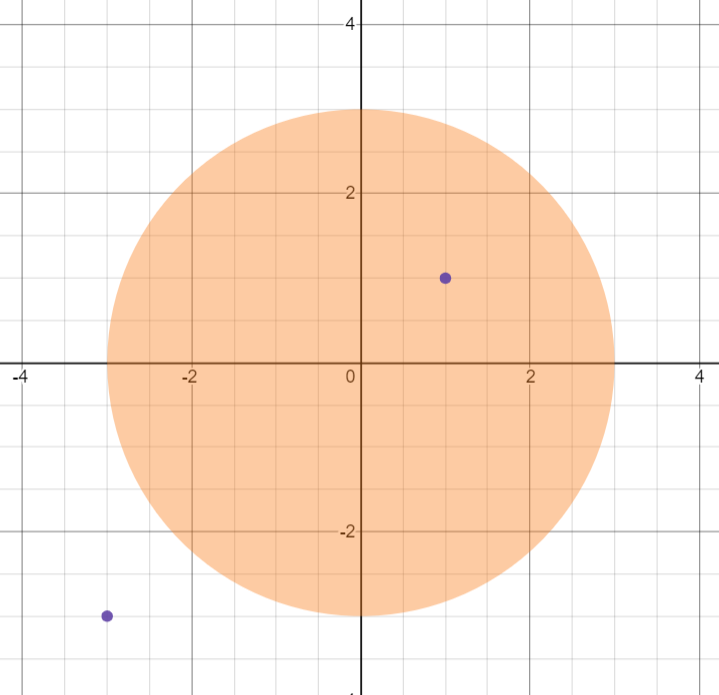

In [69]:
print(f'При h={h1}, R=1 мінімум функції f(x_min) = {f1}  в точці x_min = {xmin1} на {it1} ітерації.')
print(f'При h={h1}, R=10 мінімум функції f(x_min) = {f1_2}  в точці x_min = {xmin1_2} на {it1_2} ітерації.')

При h=0.001, R=1 мінімум функції f(x_min) = 4.1808560413419206e-05  в точці x_min = [0.9999221  1.00049076] на 22 ітерації.
При h=0.001, R=10 мінімум функції f(x_min) = 2.2874882481632076e-08  в точці x_min = [1.00000504 1.00002519] на 233 ітерації.


***Результати при розташуванні локального мінімума поза допустимою випуклою областю***

*Область*: $x_1^2 + x_2^2 \leq 1$  
*Початкова точка*: $ x^{(0)} = 
\begin{pmatrix}
  -3 \\
  -3
 \end{pmatrix}$

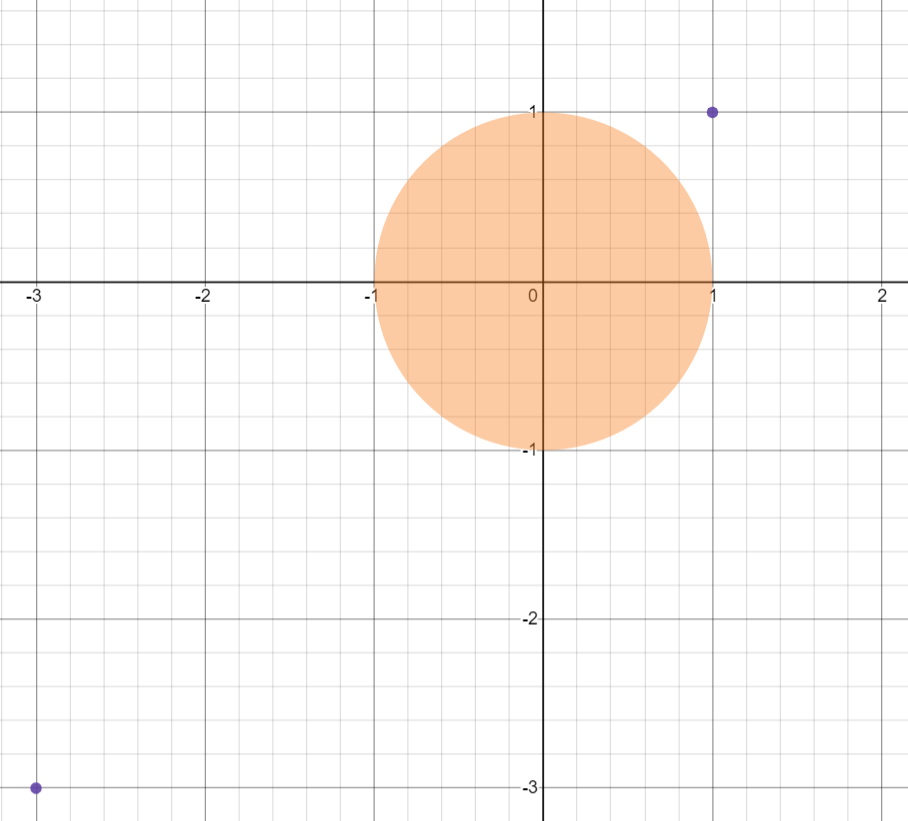

In [61]:
print(f'При h={h1}, при R=1 мінімум функції f(x_min) = {f2}  в точці x_min = {xmin2} на {it2} ітерації.')
print(f'При h={h1}, при R=10 мінімум функції f(x_min) = {f2_2}  в точці x_min = {xmin2_2} на {it2_2} ітерації.')

При h=0.001, при R=1 мінімум функції f(x_min) = 2.2732720366449736e-08  в точці x_min = [1.00000502 1.00002511] на 216 ітерації.
При h=0.001, при R=10 мінімум функції f(x_min) = 2.2732720363770713e-08  в точці x_min = [1.00000502 1.00002511] на 216 ітерації.


***Результати при розташуванні локального мінімума всередині допустимої невипуклої області***

*Область*: $\begin{cases}
    x_1^2 + x_2^2 \geq 1\\
    x_1^2 + x_2^2 \leq 9
  \end{cases}$  
*Початкова точка*: $ x^{(0)} = 
\begin{pmatrix}
  -3 \\
  -3
 \end{pmatrix}$

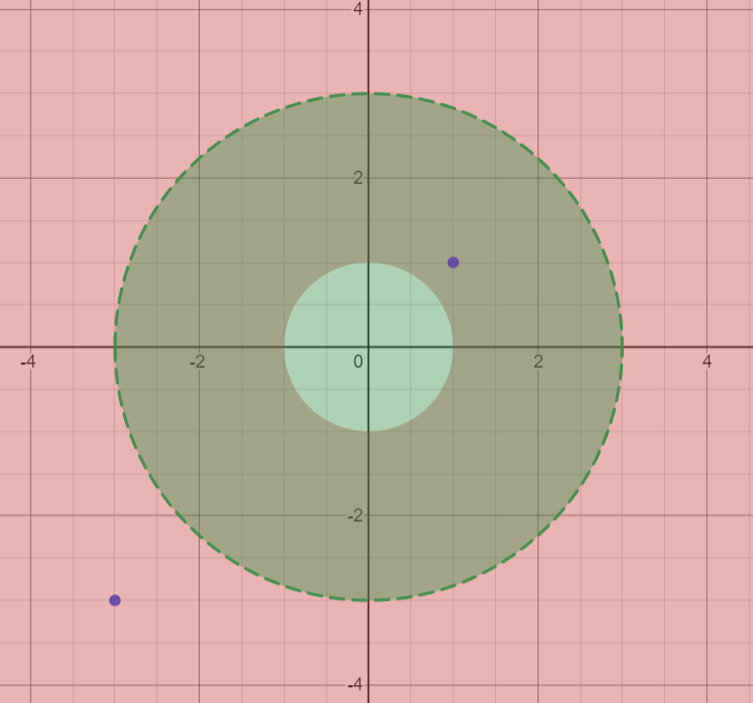

In [62]:
print(f'При h={h1}, при R=1 мінімум функції f(x_min) = {f3}  в точці x_min = {xmin3} на {it3} ітерації.')
print(f'При h={h1}, при R=10 мінімум функції f(x_min) = {f3_2}  в точці x_min = {xmin3_2} на {it3_2} ітерації.')

При h=0.001, при R=1 мінімум функції f(x_min) = 2.277136870642954e-08  в точці x_min = [1.00000503 1.00002513] на 218 ітерації.
При h=0.001, при R=10 мінімум функції f(x_min) = 2.277136870642954e-08  в точці x_min = [1.00000503 1.00002513] на 218 ітерації.


***Результати при розташуванні локального мінімума поза допустимою невипуклою областю***

*Область*: $\begin{cases}
    x_1^2 + x_2^2 \leq 1\\
    x_1^2 + x_2^2 \geq 0.25
  \end{cases}$  
  *Початкова точка*: $ x^{(0)} = 
\begin{pmatrix}
  -3 \\
  -3
 \end{pmatrix}$

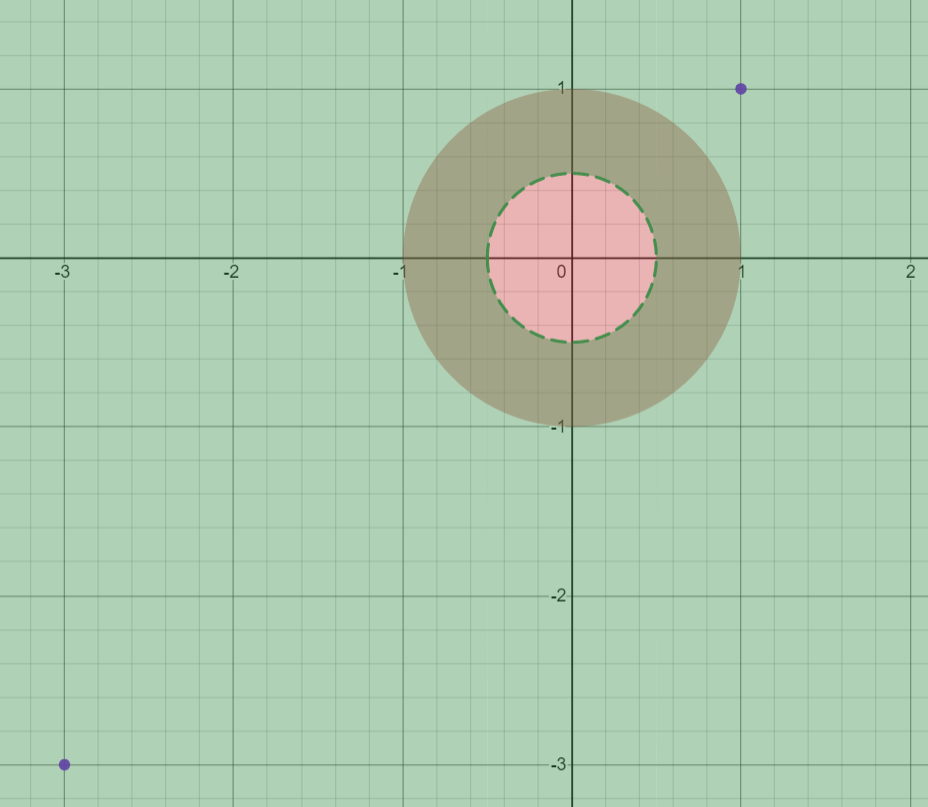

In [63]:
print(f'При h={h1}, при R=1 мінімум функції f(x_min) = {f4}  в точці x_min = {xmin4} на {it4} ітерації.')
print(f'При h={h1}, при R=10 мінімум функції f(x_min) = {f4_2}  в точці x_min = {xmin4_2} на {it4_2} ітерації.')

При h=0.001, при R=1 мінімум функції f(x_min) = 2.277136870642954e-08  в точці x_min = [1.00000503 1.00002513] на 218 ітерації.
При h=0.001, при R=10 мінімум функції f(x_min) = 2.277136870642954e-08  в точці x_min = [1.00000503 1.00002513] на 218 ітерації.


### Висновки

***Досліджуючи МНК в залежності від значення кроку h***, який використовуєтся у обчисленні похідних, *було виявлено*, що *при зменшенні значення кроку h збіжність методу прискорюється*.   
За умови однакової точності та однакової схеми обчислення похідних(в даному випадку правої схеми),  при h=0.0001 точку мінімума було знайдено на 149 ітерації,а при h=0.00001 було досягнуто точки мінімума на 20 ітерації.

***Досліджуючи МНК в залежності від застосування модифікації Левенберга-Марквардта***, то за умови обрання тих самих параметрів (точність  ε , крок h, схема обчислення похідних), що і у попередньому варіанті, отримали нижчу швидкість збіжності, ніж в МНК Гауса-Ньютона. Також слід відмітити, що крок h майже не впливає на результати збіжності при використанні модифікації Левенберга-Марквардта.

***Досліджуючи МНК в залежності від схеми обчислення похідних***. було виявлено ,що *за використання правої схеми обчислення похідних МНК Гауса-Ньютона збігається до точки мінімума швидше, ніж за використання центральної схеми обчислення похідних*.

***Досліджуючи МНК в залежності від вигляду критерію закінчення***, було виявлено ,що при використанні критерію закінчення №1((значення норми градієнта функції в точці) метод досягає точки мінімума значно швидше(за 24 ітерації,в той час коли при критерії №2 за 53 ітерації)

***Отже,*** метод найменших квадратів Гауса-Ньютона володіє дуже високою швидкістю збіжності.

***При використанні методу штрафних функцій(методу зовнішньої точки)*** було виявлено , що :

1.   В невипуклих областях були отримані однакові точки за однакову кількість ітерацій.
2.   При розташуванні поза допустимою випуклою областю було отримано майже таку ж точку як в невипуклих.
3.  А от при розташуванні точки всередині допустимої випуклої області при R=1 має найшвидшу збіжність(22 ітерації), яка в 10 раз швидша за інші.  

Швидкість збіжності у метожі зовнішньої точки приблизно така ж як і при використанні модифікації Левенберга-Марквардта , але менше ніж при МНК Гауса-Ньютона.


## Про виконавця

Студентка групи КМ-82,ФПМ  
Олійник Майя  

telegram : @mmaayvelin  
github   : https://github.com/Maykabee

## Посилання



1.   http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%9D%D1%8C%D1%8E%D1%82%D0%BE%D0%BD%D0%B0-%D0%93%D0%B0%D1%83%D1%81%D1%81%D0%B0
2.   https://mash-xxl.info/info/353672/  
3.   https://habr.com/ru/post/470181/  
4.   https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D0%B1%D0%B5%D1%80%D0%B3%D0%B0_%E2%80%94_%D0%9C%D0%B0%D1%80%D0%BA%D0%B2%D0%B0%D1%80%D0%B4%D1%82%D0%B0  
5.   http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D1%88%D1%82%D1%80%D0%B0%D1%84%D0%BD%D1%8B%D1%85_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B9
6.  https://hub.exponenta.ru/post/postanovka-zadachi-optimizatsii-i-chislennye-metody-ee-resheniya356#3_4_2  
7.  Himmelblau D.M. “APPLIED NONLINEАR PROGRAMMIG”, McGraw-Hill Book Company, 1972;
8.  Т. С. Ладогубець. Методи оптимізації - електронний конспект – Київ: НТУУ «КПІ», 2016;
9.  https://www.desmos.com
10.  Консультації з колегами :)

